In [6]:
#모델 평가 - 기본 회귀 모델
#사이킷런의 DummyRegressor
from sklearn import datasets
from sklearn.dummy import DummyRegressor
#실제 모델과 비교하기 위해 사용할 수 있는 매우 간단한 모델을 만듦
from sklearn.model_selection import train_test_split

data = datasets.load_boston()
#data = datasets.load_iris()

features, target = data.data, data.target

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

dummy = DummyRegressor(strategy = 'mean')

dummy.fit(features_train, target_train)

dummy.score(features_test, target_test)
#score가 음수?

-0.001119359203955339

In [16]:
#strategy 매개변수의 값을 constant로 주면 모든 샘플에 대해 일정한 값으로 예측
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(features_train, target_train)

ols.score(features_test, target_test)

clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

clf.score(features_test, target_test)

-0.06510502029325727

In [19]:
clf = DummyRegressor(strategy='quantile', quantile=1.0)
#분위값 기준으로 예측 - 0~1 사이, 0.5인 경우 중간값, 1은 최대값

clf.fit(features_train, target_train)

# 훈련 세트 타깃의 최대값으로 예측합니다.
clf.predict(features_test)

import numpy as np
# 훈련 세트의 타깃에서 최댓값을 확인합니다.
print('train_max:', np.max(target_train))
clf.score(features_test, target_test)

train_max: 50.0


-9.387396643523266

In [23]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
#DummyClassifier의 strategy매개변수는 예측값을 생성하는 여러 옵션 제공
#stratified: 타깃 벡터의 클래스 비율에 비례하게
#uniform: 클래스 비중이 균등하도록
#most_frequent: 무조건 훈련 세트에서 가장 많은 타깃 레이블로

from sklearn.model_selection import train_test_split

iris = load_iris()
features, target = iris.data, iris.target

features_train, features_test, target_train, target_test = train_test_split( features, target, random_state=0)

#strategy=uniform을 사용하여 클래스 비중이 균등하게 랜덤 예측
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

0.42105263157894735

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier() # 분류 모델을 만듭니다.
classifier.fit(features_train, target_train) # 모델 훈련
classifier.score(features_test, target_test) # 정확도 점수를 계산
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)
# 훈련 세트 타깃에서 가장 많은 값으로 예측합니다.
dummy.predict(features_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
#이진 분류기의 예측 평가
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

#특성 행렬과 타깃 벡터 생성
X, y = make_classification(n_samples = 10000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)

#로지스틱 회귀 모델 객체 생성
logit = LogisticRegression()

cross_val_score(logit, X, y, scoring='accuracy') #정확도를 사용하여 교차검증

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

이진 분류기의 예측 평가

 정확도 : 예측한 샘플의 비율

 정밀도 : 양성으로 예측한 샘플 중에서 진짜 양성 클래스의 비율 (예측에 포함된 잡음)
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다

 재현율 : 진짜 양성 샘플 중에서 양성으로 예측한 비율
재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다 (민감도, TPR)

 F1은 정밀도와 재현율의 조화 평균입니다.

In [ ]:
'''
정확도가 항상 좋은 척도일 수는 없다 -
예를 들어 이진 분류(양성, 음성) 문제에서 계층의 분배가 999:1인 경우 모두 양성으로 판정하는 모델의 정확도는 99.9%가 된다
이 문제의 해결을 위해 Confusion Matrix가 사용된다
         실제양성 실제음성
양성판단  진양성   위양성
음성판단  위음성   진음성

각 판정의 결과는 문제마다 다른 결과를 가져온다
예를 들어 암의 판정의 경우 양성인 환자를 음성으로 판단해선 안 되고
불량 검출 문제에서는 각 판단마다 다른 가치를 갖는다

ROC곡선에 대한 내용
http://blog.naver.com/PostView.nhn?blogId=song_daesub&logNo=221975683759&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView
'''

In [29]:
# 정밀도를 사용한 교차검증
print("precision:",cross_val_score(logit, X, y, scoring="precision"))

# 재현율을 사용한 교차검증
print("recall:",cross_val_score(logit, X, y, scoring="recall"))

# f1 점수를 사용한 교차검증
print("f1:",cross_val_score(logit, X, y, scoring="f1"))

precision: [0.95963673 0.94820717 0.9635996  0.96149949 0.96060606]
recall: [0.951 0.952 0.953 0.949 0.951]
f1: [0.95529884 0.9500998  0.95827049 0.95520886 0.95577889]


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#테스트 세트의 예측
y_hat = logit.fit(X_train, y_train).predict(X_test)

#정확도 계산
print('accuracy:',accuracy_score(y_test, y_hat))

from sklearn.model_selection import cross_validate

#정확도와 정밀도를 사용한 교차검증 - 개별적으로 보던 것을 함께 보는 방법
cross_validate(logit, X, y, scoring=['accuracy', 'precision'])
#fit_time과 score_time은 뭐지?

accuracy: 0.947


{'fit_time': array([0.01196766, 0.00897574, 0.00897598, 0.00897574, 0.00897574]),
 'score_time': array([0.00099778, 0.00199413, 0.00199461, 0.00199533, 0.00199509]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

In [35]:
#이진 분류기 임계값 평가 - ROC 곡선: 이진 분류기의 품질 평가에 널리 쓰임
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_classes=2,
                                      n_informative=3,
                                      random_state=3)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

logit = LogisticRegression()
logit.fit(features_train, target_train)

# 예측 확률을 계산합니다.
target_probabilities = logit.predict_proba(features_test)[:,1]

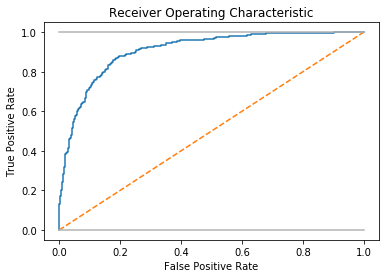

In [36]:
#진짜 양성 비율(양성으로 판단한 것들 중 맞춘 비율)(진짜양성 / (진짜양성 + 거짓음성))과 거짓 양성(양성이라 판단했는데 틀림, 실제론 음성) 비율(양성으로 판단한 것들 중 틀린 비율)(거짓양성 / (진짜음성 + 거짓양성)) 계산
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)
#결과_판단 - false_positive: 양성이라 판단했는데 틀림 (실제론 음성)

#ROC 곡선
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],c='.7'), plt.plot([1,1],c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
# 예측 확률을 계산합니다.
logit.predict_proba(features_test)[0:1]
logit.classes_

print("임계값:", threshold[116])
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:", false_positive_rate[116])

print("\n임계값:", threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:", false_positive_rate[45])

# ROC 곡선 아래 면적을 계산합니다. 1에 가까울수록 정확
roc_auc_score(target_test, target_probabilities)

임계값: 0.5331715230155317
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725

임계값: 0.818913387665929
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.047058823529411764


0.9073389355742297

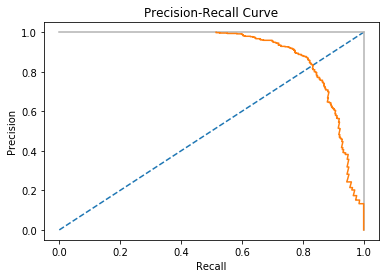

In [49]:
from sklearn.metrics import precision_recall_curve
#진짜 양성 비율과 거짓 양성 비율을 계산
precision, recall, threshold = precision_recall_curve(target_test, target_probabilities)

#ROC 곡선
plt.plot([0,1],ls='--')
plt.plot([1,1],c='.7'), plt.plot([1,1],[1,0],c='.7')

plt.plot(precision, recall)

plt.title('Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.show()

C:\Users\student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


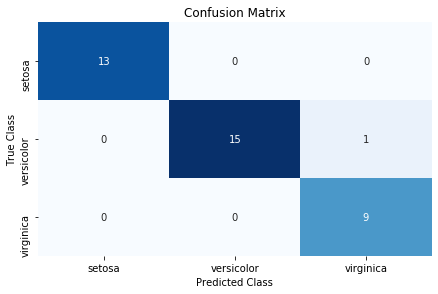

In [53]:
#분류기 성능 시각화 - heatmap 사용
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
iris = datasets.load_iris() # 데이터 로드
features = iris.data # 특성 행렬
target = iris.target # 타깃 벡터
class_names = iris.target_names # 클래스 이름 리스트

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=1)
classifier = LogisticRegression() # 로지스틱 회귀 모델 객체 생성

# 모델을 훈련하고 예측 결과를 계산합니다.
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

#confusion_matrix 생성
matrix = confusion_matrix(target_test, target_predicted)

#데이터프레임에 행렬 넣고
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

#시각화
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class')
plt.show()

In [56]:
titanic_df = pd.read_csv('data\\titanic_train.csv')
X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df['Survived']
#데이터를 csv로 불러오고, target와 나머지로 분리

#위의 모든 함수 적용
X_titanic_df = transform_feature(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)

NameError: name 'transform_feature' is not defined

In [55]:
#GridSearchCV: classifier나 regressor와 같은 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 교차 검증 수행하며 입력하면서 최적의 파라미터를 도출해주는 기능을 제공하는 클래스
#estimator 매개변수의 입력값은 classifier, regressor, pipeline
#param_grid: key (하이퍼파라미터명) + 리스트 (하이퍼파라미터값) 의 딕셔너리
#scoring: 예측 성능을 측정할 지표
#cv: 교차 검증 분할할 학습/테스트 세트 개수
#refit (true): 가장 최적의 하이퍼파라미터를 찾은 뒤 찾은 하이퍼파라미터로 estimator 재학습
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=11)

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2, 3, 5, 10],
             'min_samples_split': [2,3,5],
             'min_samples_leaf': [1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9659
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.9570


In [ ]:
#회귀 모델 평가 - MSE(Mean Squared Error)
#MSE(전체 제곱 오차)의 값이 클수록 더 나쁜 모델
#사이킷런의 scoring 매개변수값은 높을수록 좋다고 침
#따라서 사이킷런에 MSE 쓰려면 음의 MSE인 neg_mean_squared_error 사용

#회귀 모델의 평가 지표인 R^2는 모델이 설명하는 타깃 벡터의 분산을 뜻함
#R^2은 1에 가까울수록 좋음

In [57]:
#군집 모델 평가 - 클러스터의 품질을 평가하는 ""실루엣 계수""
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1) # 특성 행렬을 생성

# k-평균을 사용하여 데이터를 클러스터링하고 클래스를 예측합니다.
model = KMeans(n_clusters=2, random_state=1).fit(features)
target_predicted = model.labels_ # 예측된 클래스
silhouette_score(features, target_predicted) # 모델 평가

#클러스터 내 샘플 간의 거리는 가깝고 / 클러스터 간의 거리는 멀어야 좋은 군집
#실루엣 계수 = 

0.8916265564072142

In [58]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   random_state = 1)

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.10, random_state=1)

def custom_metric(target_test, target_predicted): # 사용자 정의 지표 함수를 정의
    r2 = r2_score(target_test, target_predicted) # R^2 점수를 계산
    return r2 # R^2 점수를 반환

# 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듭니다.
score = make_scorer(custom_metric, greater_is_better=True)
classifier = Ridge() # 릿지(ridge) 회귀 모델 객체 생성

In [63]:
model = classifier.fit(features_train, target_train) # 릿지 회귀 모델 훈련
print('Custom Score:',score(model, features_test, target_test)) # 사용자 정의 스코어 함수를 인자로 넘겨줌

target_predicted = model.predict(features_test) # 예측
print('R^2 Score:',r2_score(target_test, target_predicted)) # R^2 점수 계산
#당연히 같게 나옴 custom score도 R^2 점수 계산이므로

Custom Score: 0.9997906102882058
R^2 Score: 0.9997906102882058
